In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('D:/sentimentdataset.csv')

# Displaying the first few rows of the dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
df.drop(columns='Unnamed: 0.1', inplace=True)
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [9]:
df.isnull().sum()
df.dtypes

Id             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [13]:
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

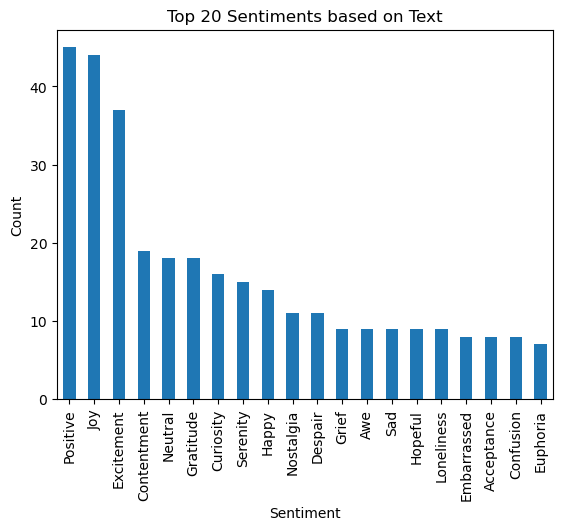

In [15]:
df['Sentiment'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

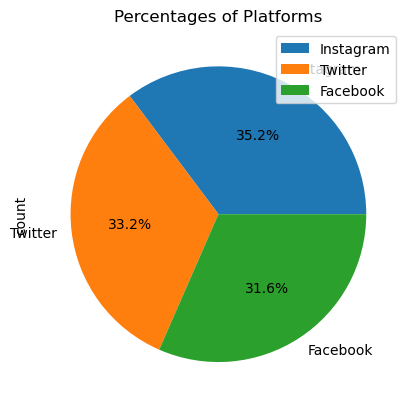

In [16]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

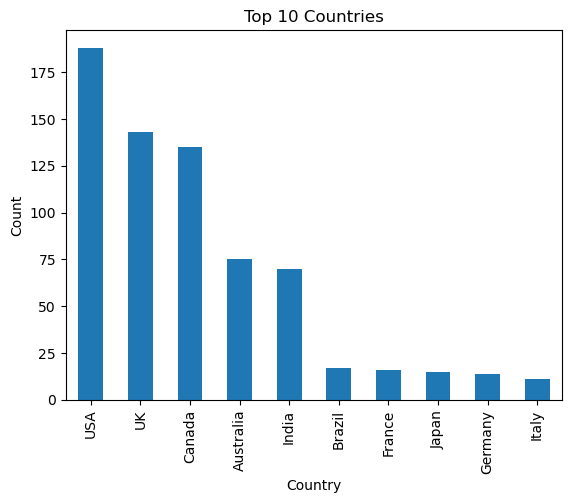

In [19]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

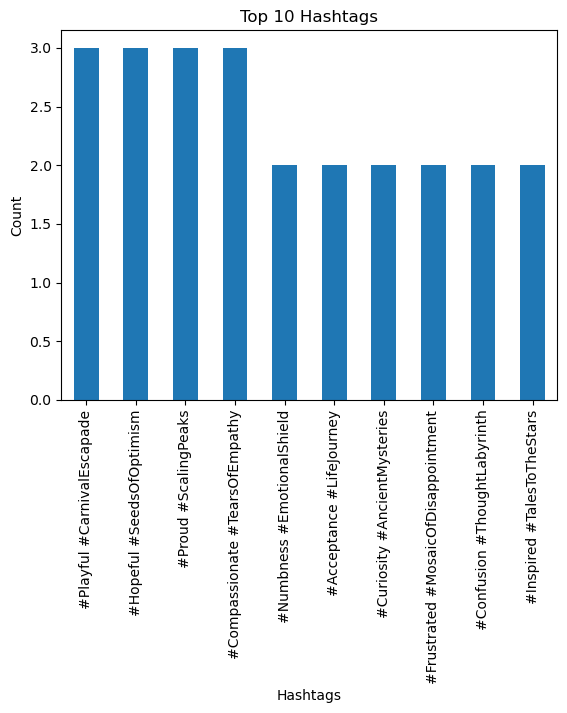

In [21]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

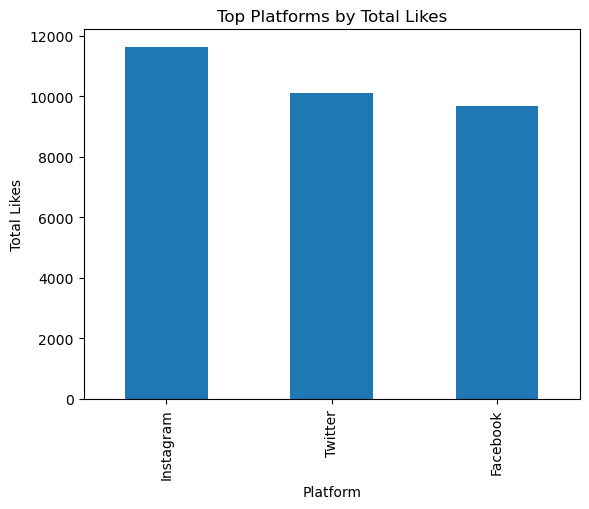

In [23]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

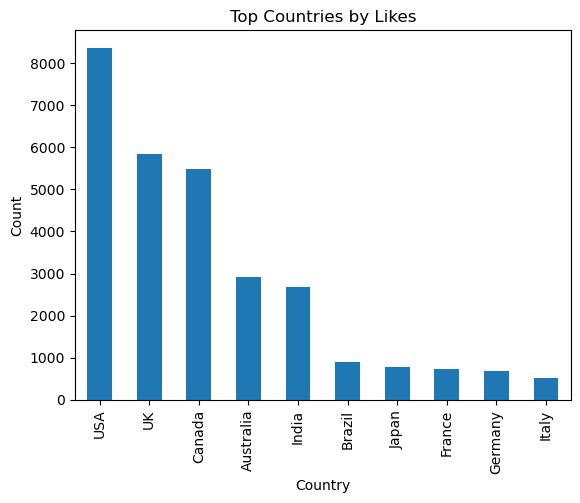

In [25]:
top_country_likes = df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top Countries by Likes')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

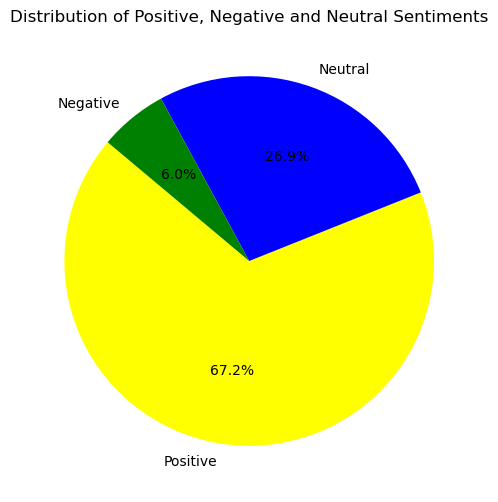

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df
# Filter for "Positive" and "Negative" sentiments only and get value counts
sentiment_counts = df2[df2['Sentiment'].isin(['Positive', 'Negative','Neutral'])]['Sentiment'].value_counts()

# Define colors for the pie chart
colors = ['Yellow','Blue','Green']  # Example colors for "Positive" and "Negative"

# Plot the pie chart
plt.figure(figsize=(10,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Set the title
plt.title("Distribution of Positive, Negative and Neutral Sentiments")

# Display the plot
plt.show()